# M11 Notes

# Dplyr

* A grammar of data transformation
* Treats functions as verbs in a vocabulary 
* Similar to SQL (`SELECT`, `WHERE`, `ORDER BY`, `GROUP BY`, etc.)
  - However, `arrange()` and `mutate()` are implicit in SQL as part of the `SELECT` clause
* Makes use of the [magrittr](https://magrittr.tidyverse.org/) pipes `%>%` to connect operations
* Introduces a new data structure -- the tibble
* Part of the Tidyverse, a replacement of basic R

In [1]:
library(tidyverse)

── Attaching packages ────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.5     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.2.1     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 1.0.0
── Conflicts ───────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


# Floating Point Comparisons

There’s another common problem you might encounter when using `==`: floating point numbers. These results might surprise you!

In [2]:
sqrt(2) ^ 2 == 2
1 / 49 * 49 == 1

[1] FALSE

[1] FALSE

Computers use finite precision arithmetic (they obviously can’t store an infinite number of digits!) so remember that every number you see is an approximation. Instead of relying on ==, use near():

In [3]:
near(sqrt(2) ^ 2,  2)
near(1 / 49 * 49, 1)

[1] TRUE

[1] TRUE

# Split-Apply-Combine

A general pattern of data transformation

* **SPLIT**: Split up table by observation into groups (smaller dataframes) based on a filter.
* **APPLY**: Apply a summary, aka aggregate function to each of the groups, which results in reducing these dataframes to single rows.
* **COMBINE**: Compine the collapsed group tables into a single table.

Examle where a dataframe is split by the values $[A,B,C]$ in `Col 1`:

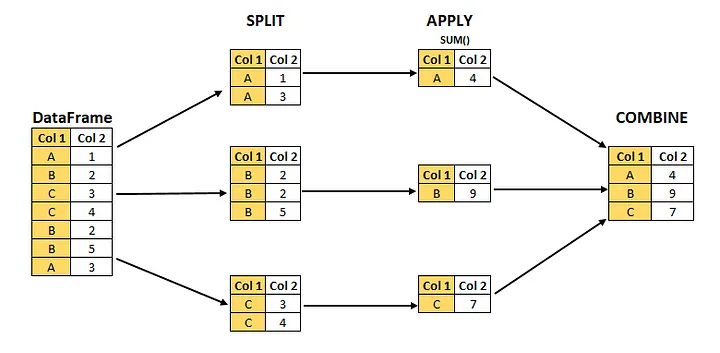

**Simple Example**

In [4]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [5]:
agg_by_cyl <- mtcars %>% 
    group_by(cyl) %>% 
    summarise(avg_mpg = mean(mpg), avg_hp = mean(hp)) 

In [6]:
agg_by_cyl

cyl,avg_mpg,avg_hp
<dbl>,<dbl>,<dbl>
4,26.66364,82.63636
6,19.74286,122.28571
8,15.10000,209.21429


In [7]:
agg_by_cyl <- agg_by_cyl %>% mutate(hp_per_cyl = avg_hp / cyl)

In [8]:
agg_by_cyl

cyl,avg_mpg,avg_hp,hp_per_cyl
<dbl>,<dbl>,<dbl>,<dbl>
4,26.66364,82.63636,20.65909
6,19.74286,122.28571,20.38095
8,15.10000,209.21429,26.15179


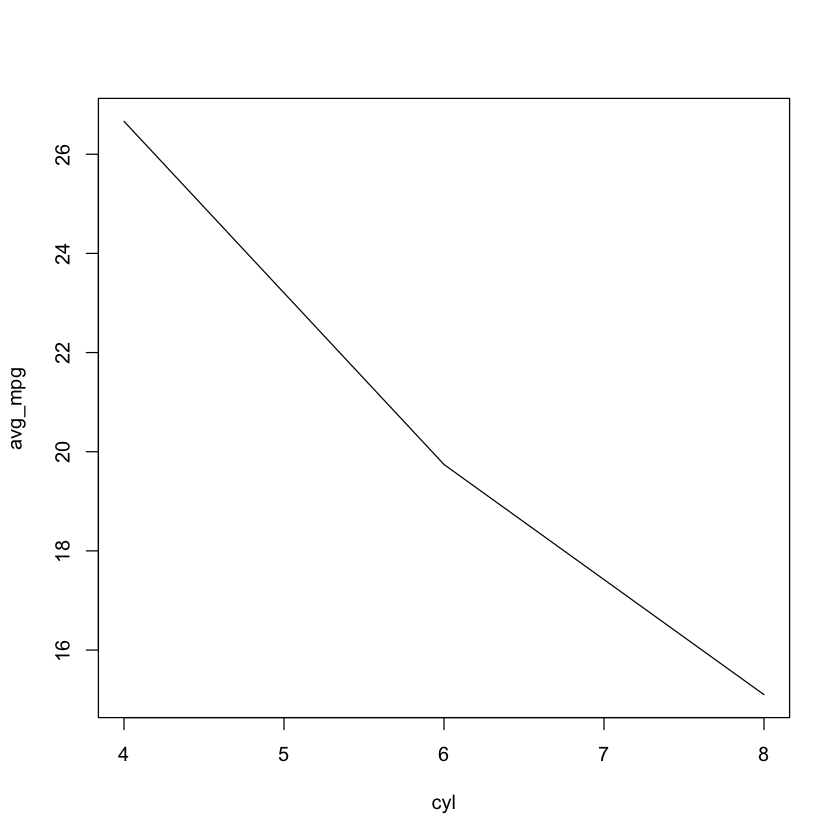

In [9]:
agg_by_cyl %>%
    select(cyl, avg_mpg) %>% 
    plot(type='l')

See [this article](https://pages.stat.wisc.edu/~yandell/R_for_data_sciences/curate/tidyverse.html) by Brian S. Yandell, a professor of statistics at Wisconsin, for a deeper dive into this topic.


# Helpers

```r
na.rm = TRUE
n = n()
```

# Joins

See [Chapter 13, "Joins"](https://r4ds.hadley.nz/joins.html#introduction) in [_R for Data Science (2e)_](https://r4ds.hadley.nz/)